# Process and plot DashT Performance CSV-file output

>**Note** that this file is build and processed under Jupyter Lab. There is a [PDF file](TWA_TWS_STW_history) illustrating the result. The Python 3 code below does not require Jupyter Lab to be executed.

DashT and its Tactics instruments with profiling features - baro, wind and performance history - have an option to record the values they are displaying into a CSV-formatted files with time stamps.

In this example, we study the polar performance history records. They are providing Tactics smoothed performance and boat speed but also smoothed TWA and TWS values.

For the usage of common Panda data tools, it is recommended to request DashT to record also the clock ticks: they are the easiest to parse.

> Useful reading about Unix timestamps: https://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/

>About filters: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

>About plotting: https://tutorials.technology/tutorials/17-how-to-plot-with-python-pandas.html

In [1]:
import pandas as pd
df = pd.read_csv("polar.csv", sep=',')

Let's study the structure first

In [2]:
df.head()

,ClockTicks,UTC-ISO8601,Date,local Time,AvgTWA,AvgTWS,smoothed BoatSpd,Percent
0,1569172920482,2019-09-22T17:22:00Z,9/22/2019,7:22:00 PM,140,23.3,6.03,75.00
1,1569172920930,2019-09-22T17:22:00Z,9/22/2019,7:22:00 PM,128,23.2,6.05,75.41
2,1569172925552,2019-09-22T17:22:05Z,9/22/2019,7:22:05 PM,131,23.3,6.07,75.27
3,1569172930553,2019-09-22T17:22:10Z,9/22/2019,7:22:10 PM,135,23.2,6.04,75.80
4,1569172935553,2019-09-22T17:22:15Z,9/22/2019,7:22:15 PM,137,23.0,6.01,75.66


In [3]:
df.tail()

,ClockTicks,UTC-ISO8601,Date,local Time,AvgTWA,AvgTWS,smoothed BoatSpd,Percent
464,1569175240663,2019-09-22T18:00:40Z,9/22/2019,8:00:40 PM,86,21.9,6.63,90.99
465,1569175245661,2019-09-22T18:00:45Z,9/22/2019,8:00:45 PM,75,21.3,6.65,90.82
466,1569175250662,2019-09-22T18:00:50Z,9/22/2019,8:00:50 PM,65,21.1,6.54,87.91
467,1569175255664,2019-09-22T18:00:55Z,9/22/2019,8:00:55 PM,68,21.1,6.51,86.81
468,1569175260661,2019-09-22T18:01:00Z,9/22/2019,8:01:00 PM,60,21.2,6.51,86.74


In [4]:
dates_df = pd.read_csv("polar.csv", sep=',', parse_dates=['ClockTicks'])

Convert Unix timestamps

In [5]:
dates_df['ClockTicks'] = pd.to_datetime(df['ClockTicks'], unit='ms')

Plot Boat Speed

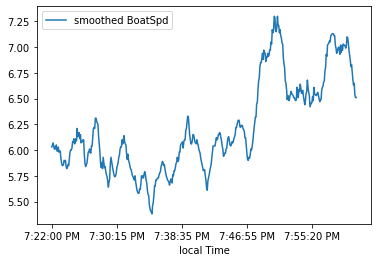

In [6]:
import matplotlib.pyplot as plt
df.plot(x='local Time',y='smoothed BoatSpd')
plt.show()